# Species Survey over the years

## Importing required modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
%matplotlib inline

#### Extracting data from csv file
##### Required files in the directory
##### 1. species.csv
##### 2. surveys.csv

In [2]:
df_species = pd.read_csv("species.csv")
df_surveys = pd.read_csv("surveys.csv")

#### Merging two csv files based on key species_id

In [3]:
df_total = pd.merge(df_species, df_surveys, on = 'species_id')

### Problem statement 1 - Plot a histogram for "the count of all the rodents over the years"

##### Separating the data that only has rodents

In [4]:
# df_rodents = df_total[df_total['taxa'] == "Rodent"]
df_rodents = df_total.loc[df_total['taxa']=="Rodent", : ]
#df_rodents.head()
#can be done either of the ways and the second one is effiecient because of chained indexing

##### Plotting Histogram for the count of all rodents

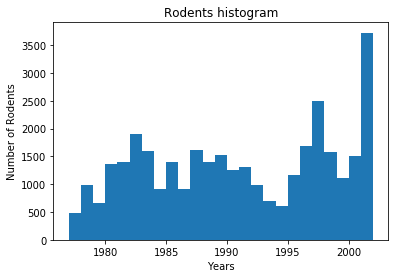

In [5]:
plt.title("Rodents histogram")
plt.xlabel("Years")
plt.ylabel("Number of Rodents")
plt.hist(df_rodents['year'], bins = 25)
plt.show()

#print(df_rodents['year'].value_counts())   -- will give the exact count

##### Inference from the above graph: The above histogram indicates that the count of rodents has been considerably reducing from 1990 to 1995 and it is high near 2000 and is maximum in 2002 

### Problem statement 2 - PLot a bar graph showing the distribution of rodents discovered in the winter season

#### Sorting the data that cover only winter

In [6]:
#df_rodents_winter = df_rodents [(df_rodents['month'] == 1) | (df_rodents['month'] == 2) | (df_rodents['month'] == 12)]
df_rodents_winter = df_rodents[df_rodents.month.isin([1, 2, 12])]
# both are same and we can use any.. better second because very less to type

#### Plotting the bar graph over winter season

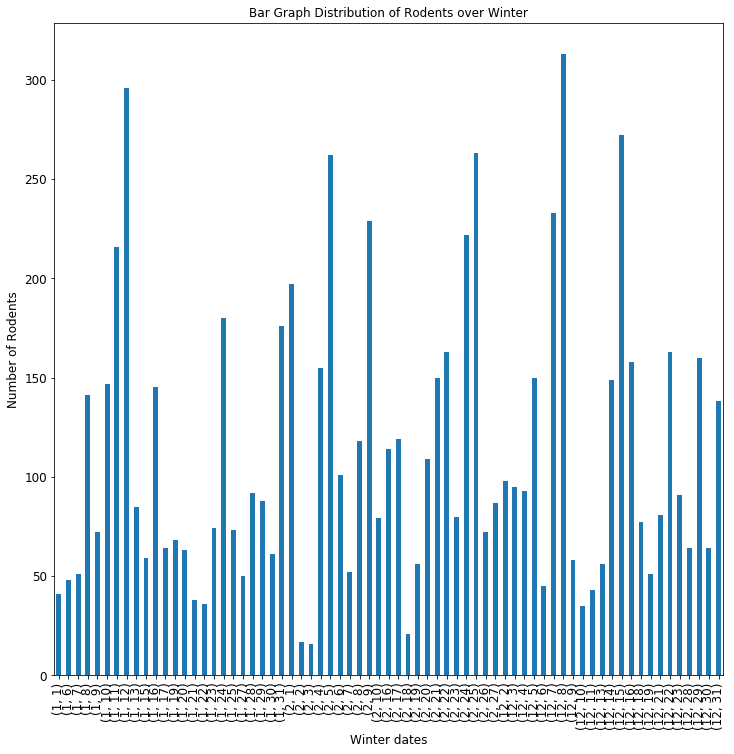

In [7]:
barGraph_winter = df_rodents_winter.groupby(['month', 'day']).taxa.count().plot(kind = 'bar', fontsize = 12, figsize = (12,12),
                                                              title = 'Bar Graph Distribution of Rodents over Winter')
barGraph_winter.set_xlabel ('Winter dates', fontsize = 12)
barGraph_winter.set_ylabel ('Number of Rodents', fontsize = 12)

##### Inference from the above plot: The bar chart above decribes the distribution of Rodents over winter season on a daily basis over the years

##### Alternative Method - Plotting the bar graph over winter season using CROSSTAB

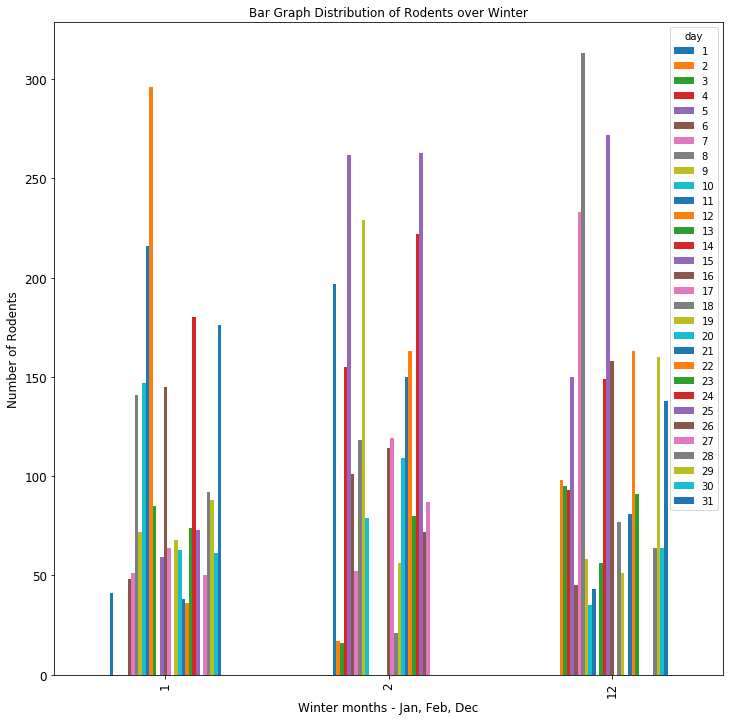

In [8]:
#pd.crosstab(df_rodents_winter['month'], df_rodents_winter['day']) -- for table
barGraph_winter = pd.crosstab(df_rodents_winter['month'], df_rodents_winter['day']).plot(kind = 'bar',fontsize = 12, figsize = (12,12),
                                                                              title = 'Bar Graph Distribution of Rodents over Winter')
barGraph_winter.set_xlabel ('Winter months - Jan, Feb, Dec', fontsize = 12)
barGraph_winter.set_ylabel ('Number of Rodents', fontsize = 12)

##### Inference from the above plot: The bar chart above decribes the distribution of Rodents over winter season on a daily basis over the years

### Problem statement 3 - Plot the count of female and male species discovered over the years

In [9]:
#df_total['sex'].isnull().sum()    # gives the total count of NaN presnt in that
#df_total['sex'].value_counts(dropna = False)    # gives the total count

##### Plotting Stacked Bar Graph of male and female species over years

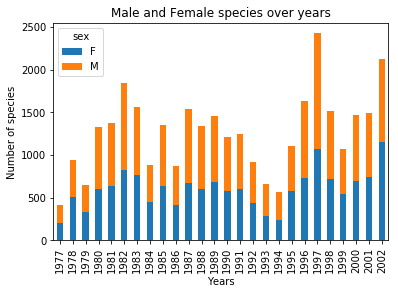

In [10]:
stackedBarGraph_male_female = pd.crosstab(df_total['year'],df_total['sex']).plot(kind = 'bar', stacked = True,
                                                          title = "Male and Female species over years")
stackedBarGraph_male_female.set_xlabel ('Years')
stackedBarGraph_male_female.set_ylabel ('Number of species')

##### Inference from the above plot: The stacked bar chart above represents the count of male and female species over the years

## Section B

### Problem statement : Present the total number of different genus observed throughout the years

([<matplotlib.patches.Wedge at 0x7fae648f5748>,
  <matplotlib.text.Text at 0x7fae647cc4e0>])

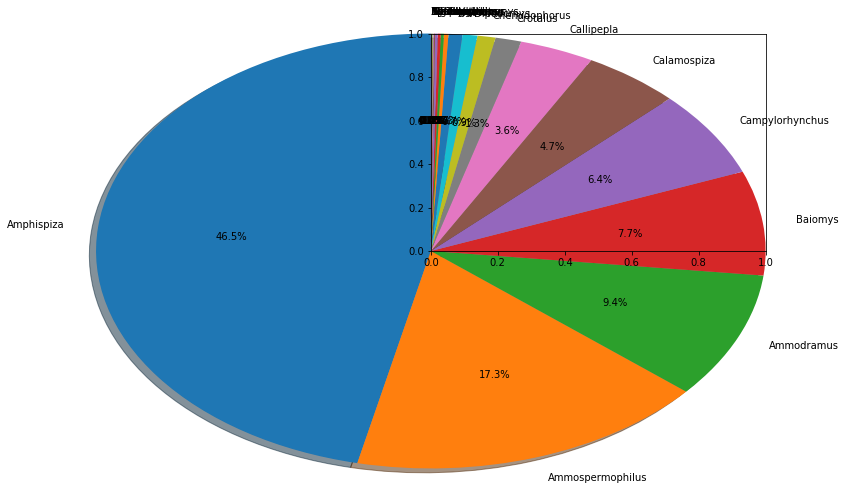

In [74]:
# Plotting a pie chart for the 'genus' observed all together over years
plt.pie(df_total.genus.value_counts(), 
        labels = df_total.genus.drop_duplicates(keep = 'first'), 
        shadow =True, autopct = '%1.1f%%',startangle = 90, frame=True)

#giving the axes as the total values of the individual genus found
#labels - directly getting the series by dropping duplicates
#autopct - gives the percetage directly

##### Inference from the above plot: The pie chart above decribes the distribution of overall genus over the years, Amphispiza taking the highest percentage

### Problem statement : Weights change of male and female species of Rodents over years

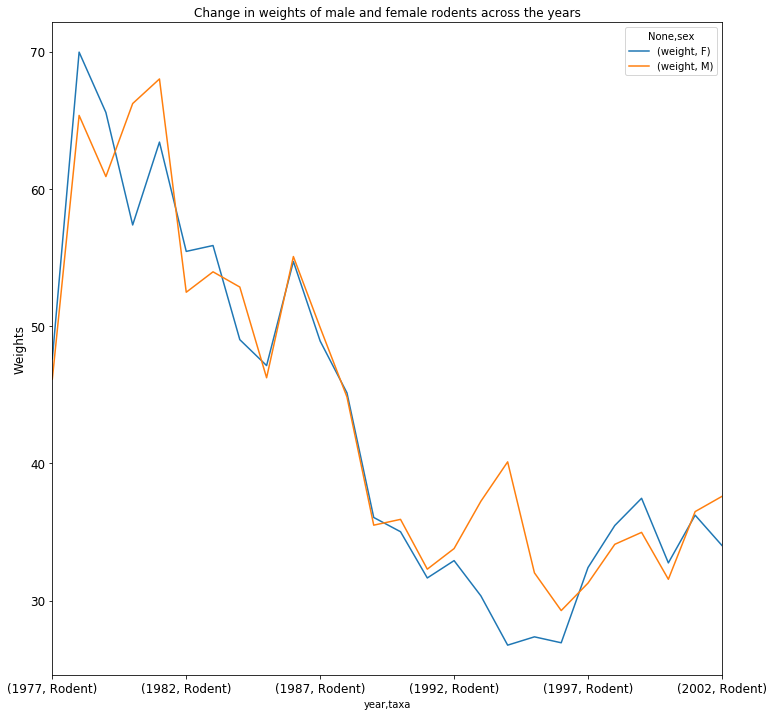

In [77]:
#df_total.loc[:, ['year','sex','weight','taxa']]
df_total.pivot_table(values = ['weight'], columns='sex', index=['year','taxa'])
plot_weights = df_total.pivot_table(values = ['weight'], columns='sex', index=['year','taxa']).plot(title='Change in weights of male and female rodents across the years',
                                                                                    figsize = (12,12), fontsize =12, label = 'Weight,sex')
plot_weights.set_ylabel ('Weights', fontsize = 12)

#using pivot table, calculating the averages/means of weights directly in the reuired plotting format

##### Inference from the above plot: The above line chart represents the variation of weights of male and female rodents over the years. It shows that there's a sudden increase in the weights around 1980, but there's a considerable decrease in their weights.

### Problem statement : HindFoot length change of male and female species of Rodents over years

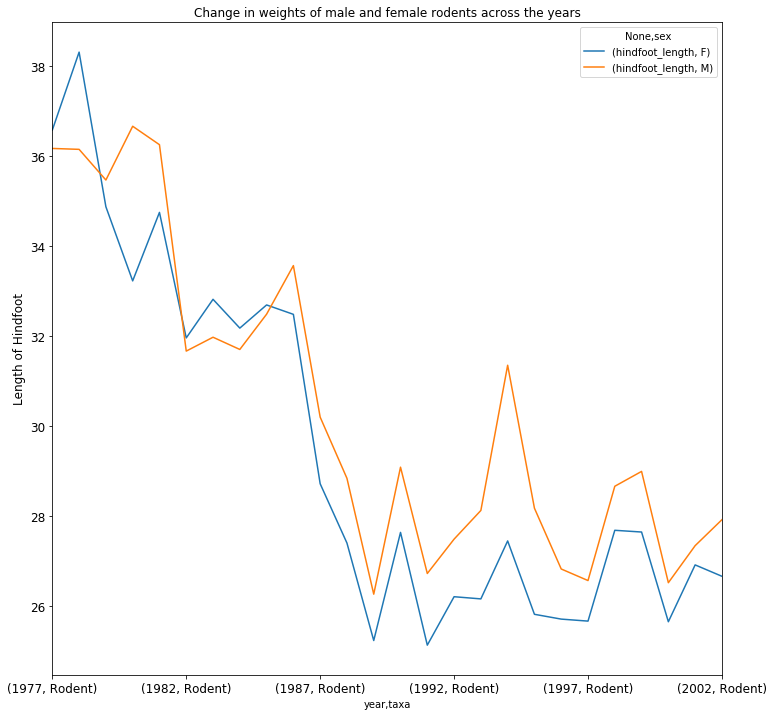

In [81]:
plot_weights = df_total.pivot_table(values = ['hindfoot_length'], columns='sex', index=['year','taxa']).plot(title='Change in weights of male and female rodents across the years',
                                                                                    figsize = (12,12), fontsize =12, label = 'Weight,sex')
plot_weights.set_ylabel ('Length of Hindfoot', fontsize = 12)
#using pivot table, calculating the averages/means of hind foot lengths directly in the reuired plotting format

##### Inference from the above plot: The above line chart represents the variation of weights of male and female rodents over the years. It shows that there's a sudden increase in the hindfoot lengths around 1987, but there's a considerable decrease in their hindfoot lengths and seems to be less varying after the that.